<a href="https://colab.research.google.com/github/NadaBotros/ACML/blob/master/Copy_of_nada_bachelor2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from random import random as rand
from random import sample
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense,BatchNormalization,LeakyReLU,UpSampling2D,Dropout,Conv1D,Flatten,Input,Embedding,Activation,TimeDistributed,Conv2D,MaxPool2D,MaxPooling2D,Conv1D,MaxPool1D,MaxPooling1D,Bidirectional,concatenate
from keras.models import Model
from keras.layers import LSTM
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import svm

In [ ]:
np.random.seed(69)

In [ ]:
data = pd.read_csv('/content/data.csv')

In [ ]:
data.head()

,Power,Rpm,Bpm,PedalBlob,HeelBlob,AnkleBlob,KneeBlob,KneeBlob2,HipBlob
0,70,84,93,87.365252,93.664993,153.219998,129.651301,50.348699,57.880403
1,72,87,94,68.580154,78.741394,144.310995,66.360850,113.639150,23.906760
2,74,85,96,40.932063,87.590054,148.065035,126.466182,53.533818,47.949046
3,76,86,97,22.870888,80.794876,147.206440,78.979316,101.020684,37.680583
4,74,87,97,5.783904,81.411350,143.271388,107.999022,72.000978,33.141440


In [ ]:
y = data[['Power','Rpm','Bpm']].values

In [ ]:
x = data[['PedalBlob','HeelBlob','KneeBlob','KneeBlob2','HipBlob']].values

In [ ]:
np.unique(y,return_counts=True)

(array([ 41,  42,  43,  44,  45,  46,  47,  48,  57,  58,  59,  60,  61,
         62,  63,  64,  67,  68,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 139, 140, 141, 142, 143,
        144, 152, 153, 154, 155, 156, 157, 158, 159, 160, 163, 166, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181,
        182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194,
        195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 207, 209,
        210, 212, 217, 219, 228, 234, 235, 236, 237, 238, 239, 240, 241,
        243, 255, 256, 257, 258, 259, 260, 261, 262, 279]),
 array([ 2,  2,  2,  2,  2,  2,  2,  2,  3,  2,  2,  2,  2,  2, 

In [ ]:
def change_vals(old1,old2,new,y):
  for i in range(len(y)):
      if (old1<=y[i]<old2):
        y[i]= new

In [ ]:
X = lX.copy()
Y = lY.copy()
steps=9
for i in range(0,115,steps):
  change_vals(i,i+steps,i,Y)
np.unique(Y,return_counts=True)

(array([  0.,   9.,  18.,  27.,  36.,  45.,  54.,  63.,  72.,  81.,  90.,
        108.]), array([81, 87, 66, 94, 89, 81, 88, 58, 42, 53, 12,  7]))

In [ ]:
model = Sequential()
model.add((LSTM(10, return_sequences=True, input_shape=(1,5))))
model.add((LSTM(100, return_sequences=False)))
model.add((Dense(3, activation='relu')))
model.compile(loss='mse',
            optimizer='rmsprop', #keras.optimizers.RMSprop(1e-5)
            metrics=['accuracy'])
model.summary()

Model: "sequential_53"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_79 (LSTM)               (None, 1, 10)             640       
_________________________________________________________________
lstm_80 (LSTM)               (None, 100)               44400     
_________________________________________________________________
dense_200 (Dense)            (None, 3)                 303       
Total params: 45,343
Trainable params: 45,343
Non-trainable params: 0
_________________________________________________________________


In [ ]:

save_best=keras.callbacks.ModelCheckpoint(f"/content/model.h5",
                                                  monitor='val_loss', verbose=1,
                                                  save_best_only=True)

early_stop=keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0,
                                                  patience=15, verbose=1, mode='auto',
                                                  restore_best_weights=True)


In [ ]:
print(x.shape,y.shape)

(758, 5) (758, 3)


In [ ]:
x_reshaped = x.reshape((len(x),1,5))

In [ ]:
history = model.fit(x_reshaped,np.rint(y),
        batch_size=132,epochs=2000,verbose=1,
        validation_data=(x_reshaped,y),
        callbacks=[save_best,early_stop],
        shuffle=True)

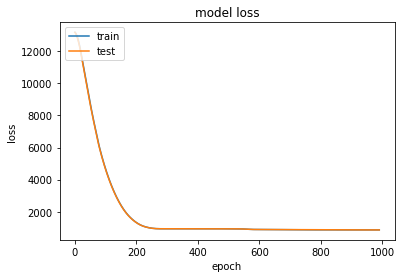

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
x_reshaped = x.reshape((len(X),1,5))

In [ ]:
i=50
pred = np.rint(model.predict(x_reshaped[:i]))
real = np.rint(y[:i])

In [ ]:
c=0
for i in range(len(pred)):
  print(f"real: {real[i]}\npred: {pred[i]}")
  print()
  c+=1

print(c)

real: [70. 84. 93.]
pred: [136.  86. 113.]

real: [72. 87. 94.]
pred: [136.  86. 113.]

real: [74. 85. 96.]
pred: [135.  86. 113.]

real: [76. 86. 97.]
pred: [136.  86. 113.]

real: [74. 87. 97.]
pred: [118.  87. 108.]

real: [74. 87. 98.]
pred: [136.  86. 113.]

real: [77. 87. 99.]
pred: [101.  88. 104.]

real: [67. 87. 99.]
pred: [136.  86. 113.]

real: [ 67.  87. 100.]
pred: [ 93.  88. 101.]

real: [ 74.  86. 101.]
pred: [136.  86. 113.]

real: [ 82.  87. 101.]
pred: [106.  88. 105.]

real: [ 72.  87. 101.]
pred: [136.  86. 113.]

real: [ 72.  87. 101.]
pred: [135.  86. 113.]

real: [ 79.  87. 100.]
pred: [136.  86. 113.]

real: [ 83.  88. 100.]
pred: [136.  86. 113.]

real: [ 73.  88. 100.]
pred: [133.  86. 112.]

real: [ 73.  88. 100.]
pred: [136.  86. 113.]

real: [ 78.  88. 101.]
pred: [89. 88. 99.]

real: [ 78.  88. 101.]
pred: [136.  86. 113.]

real: [ 78.  88. 101.]
pred: [121.  87. 109.]

real: [ 78.  89. 101.]
pred: [89. 88. 99.]

real: [ 78.  89. 101.]
pred: [89. 88. 99.]


In [ ]:
X = x.copy()

In [ ]:
X = set(tuple(element) for element in X)

In [ ]:
len(X)

661

In [ ]:
lX[0]

array([195, 101, 129])

In [ ]:
lX =[]
lY=[]
for i in range(len(data)):
  Dat = data[(data.Power==x[i,0]) & (data.Rpm==x[i,1]) & (data.Bpm==x[i,2]) ]
  avged = Dat[['PedalBlob']].mean()
  lX.append(Dat[['Power','Rpm','Bpm']].mean().values)
  lY.append(avged[0])
  # if (len(Dat)>1):
  # else:
  #     lY.append(avged[0])


In [ ]:
lX= np.array(lX)
lY= np.array(lY)
lX.shape

(758, 3)

In [ ]:
lX= []
for X_ in X:
  print(X_)
  lX.append(np.array(X_))

In [ ]:
lX = np.array(lX)

In [ ]:
lX.shape

(661, 3)

[110  80 119]
[120  83 120]
